<h1>MOT in Northern Ireland 2018-19</h1>

This project explores the MOT outcomes for cars in Northern Ireland during 2018-19. The data was obtained from www.opendatani.org.uk

The prioritised list of requirements for this project are:

Must

<p>It must find out which test centre had the highest pass rate for full tests on cars.</p>
<p>It must find out which test centre had the highest pass rate for re-tests on cars.</p>

Should

<p>Save the results of the pass rates to a csv file for future reference.</p>
<p>Use visualisations to compare the results across each test centre.</p>

Could

<p>Use Jupyter notebook to display the code and results.</p>

Won't 

<p>Compare test outcomes for other vehicles e.g Taxis, HGV.</p>
<p>Compare test outcomes across previous years.</p>


In [48]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

import pandas as pd
import seaborn as sns

cols_to_use = ['TestCentre', 'TestDetails','CarsFullTests', 'CarsRetests']

mot = pd.read_csv('mot_outcomes.csv', usecols=cols_to_use)

In [49]:
mot.values

array([['Armagh', 'Conducted', 39060.0, 4801.0],
       ['Armagh', 'Pass', 31133.0, 4516.0],
       ['Armagh', 'Fail', 7927.0, 285.0],
       ['Armagh', 'Pass %', 0.797055812, 0.940637367],
       ['Ballymena', 'Conducted', 54819.0, 11488.0],
       ['Ballymena', 'Pass', 44514.0, 10772.0],
       ['Ballymena', 'Fail', 10305.0, 716.0],
       ['Ballymena', 'Pass %', 0.812017731, 0.937674095],
       ['Belfast (Balmoral)', 'Conducted', 75112.0, 12738.0],
       ['Belfast (Balmoral)', 'Pass', 63850.0, 12128.0],
       ['Belfast (Balmoral)', 'Fail', 11262.0, 610.0],
       ['Belfast (Balmoral)', 'Pass %', 0.850063905, 0.952111791],
       ['Coleraine', 'Conducted', 52300.0, 8888.0],
       ['Coleraine', 'Pass', 42441.0, 8389.0],
       ['Coleraine', 'Fail', 9859.0, 499.0],
       ['Coleraine', 'Pass %', 0.811491396, 0.943856886],
       ['Cookstown', 'Conducted', 49706.0, 11017.0],
       ['Cookstown', 'Pass', 39747.0, 10387.0],
       ['Cookstown', 'Fail', 9959.0, 630.0],
       ['Cooksto

In [50]:
#Check to see what the first five rows of the data frame look like
mot.head()

,TestCentre,TestDetails,CarsFullTests,CarsRetests
0,Armagh,Conducted,39060.000000,4801.000000
1,Armagh,Pass,31133.000000,4516.000000
2,Armagh,Fail,7927.000000,285.000000
3,Armagh,Pass %,0.797056,0.940637
4,Ballymena,Conducted,54819.000000,11488.000000


In [51]:
mot.dtypes

TestCentre        object
TestDetails       object
CarsFullTests    float64
CarsRetests      float64
dtype: object

In [52]:
#I am only interested in the pass rates for cars so need to create a new dataframe
cars = mot[['TestCentre', 'TestDetails','CarsFullTests', 'CarsRetests']]
cars.head(10)

,TestCentre,TestDetails,CarsFullTests,CarsRetests
0,Armagh,Conducted,39060.000000,4801.000000
1,Armagh,Pass,31133.000000,4516.000000
2,Armagh,Fail,7927.000000,285.000000
3,Armagh,Pass %,0.797056,0.940637
4,Ballymena,Conducted,54819.000000,11488.000000
5,Ballymena,Pass,44514.000000,10772.000000
6,Ballymena,Fail,10305.000000,716.000000
7,Ballymena,Pass %,0.812018,0.937674
8,Belfast (Balmoral),Conducted,75112.000000,12738.000000
9,Belfast (Balmoral),Pass,63850.000000,12128.000000


In [53]:
#I am only interested in the data for pass and pass % so I create a new data frame for each
pass_rate = mot[mot['TestDetails'] == 'Pass']
percentage = mot[mot['TestDetails'] == 'Pass %']

#First I look at the pass rate
pass_rate

,TestCentre,TestDetails,CarsFullTests,CarsRetests
1,Armagh,Pass,31133.0,4516.0
5,Ballymena,Pass,44514.0,10772.0
9,Belfast (Balmoral),Pass,63850.0,12128.0
13,Coleraine,Pass,42441.0,8389.0
17,Cookstown,Pass,39747.0,10387.0
21,Craigavon,Pass,38545.0,7649.0
25,Downpatrick,Pass,26644.0,5612.0
29,Enniskillen,Pass,28536.0,6333.0
33,Larne,Pass,27799.0,6229.0
37,Lisburn,Pass,50284.0,8368.0


In [54]:
#I want to check what is the total number of cars passed in Northern Ireland

full_test = pass_rate['CarsFullTests']
full_test.sum()



629920.0

In [55]:
#To see which centre has the highest number of passes I need to sort the data frame
pass_rate.sort_values('CarsFullTests', ascending=False)

,TestCentre,TestDetails,CarsFullTests,CarsRetests
53,Newtownards,Pass,77721.0,14821.0
9,Belfast (Balmoral),Pass,63850.0,12128.0
37,Lisburn,Pass,50284.0,8368.0
41,Londonderry (New Buildings),Pass,47310.0,8433.0
5,Ballymena,Pass,44514.0,10772.0
45,Mallusk,Pass,44229.0,11384.0
13,Coleraine,Pass,42441.0,8389.0
49,Newry,Pass,41588.0,9866.0
17,Cookstown,Pass,39747.0,10387.0
21,Craigavon,Pass,38545.0,7649.0


I can see that Newtownards has the highest number of cars passed on their full test. However, this figure tells me nothing about the number of cars passed in relation to the overall total of cars going through their MOT. So I need the percentage.


In [56]:
percentage

,TestCentre,TestDetails,CarsFullTests,CarsRetests
3,Armagh,Pass %,0.797056,0.940637
7,Ballymena,Pass %,0.812018,0.937674
11,Belfast (Balmoral),Pass %,0.850064,0.952112
15,Coleraine,Pass %,0.811491,0.943857
19,Cookstown,Pass %,0.799642,0.942816
23,Craigavon,Pass %,0.804865,0.936116
27,Downpatrick,Pass %,0.810242,0.945099
31,Enniskillen,Pass %,0.796583,0.935727
35,Larne,Pass %,0.762431,0.936129
39,Lisburn,Pass %,0.834008,0.954597


In [57]:
#I need to fix the percentage

def percent_convert(value):
    result = int(value*100)
    return result


In [58]:
#Checking that my function works

percent_convert(0.827908)

82

In [59]:
passrate = percentage['CarsFullTests']
retest_rate = percentage['CarsRetests']
percentage['passrate%'] = passrate.apply(percent_convert)
percentage['retest_rate%'] = retest_rate.apply(percent_convert)
percentage

C:\Users\Cheryl Gamble\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Cheryl Gamble\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,TestCentre,TestDetails,CarsFullTests,CarsRetests,passrate%,retest_rate%
3,Armagh,Pass %,0.797056,0.940637,79,94
7,Ballymena,Pass %,0.812018,0.937674,81,93
11,Belfast (Balmoral),Pass %,0.850064,0.952112,85,95
15,Coleraine,Pass %,0.811491,0.943857,81,94
19,Cookstown,Pass %,0.799642,0.942816,79,94
23,Craigavon,Pass %,0.804865,0.936116,80,93
27,Downpatrick,Pass %,0.810242,0.945099,81,94
31,Enniskillen,Pass %,0.796583,0.935727,79,93
35,Larne,Pass %,0.762431,0.936129,76,93
39,Lisburn,Pass %,0.834008,0.954597,83,95


In [60]:
percentage.sort_values('passrate%', ascending=False)

,TestCentre,TestDetails,CarsFullTests,CarsRetests,passrate%,retest_rate%
11,Belfast (Balmoral),Pass %,0.850064,0.952112,85,95
39,Lisburn,Pass %,0.834008,0.954597,83,95
43,Londonderry (New Buildings),Pass %,0.827908,0.960697,82,96
55,Newtownards,Pass %,0.828768,0.949212,82,94
7,Ballymena,Pass %,0.812018,0.937674,81,93
15,Coleraine,Pass %,0.811491,0.943857,81,94
27,Downpatrick,Pass %,0.810242,0.945099,81,94
47,Mallusk,Pass %,0.812585,0.946065,81,94
59,Omagh,Pass %,0.812987,0.937237,81,93
23,Craigavon,Pass %,0.804865,0.936116,80,93


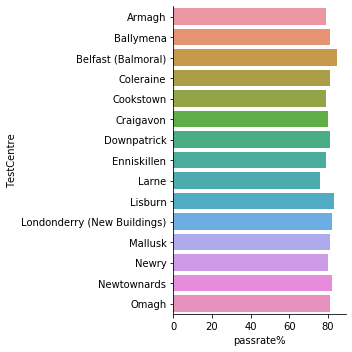

In [61]:
#I want to visually show which centre had the highest pass rates for full tests

graph1 = sns.catplot(x='passrate%', y='TestCentre', kind='bar', data=percentage)
graph1

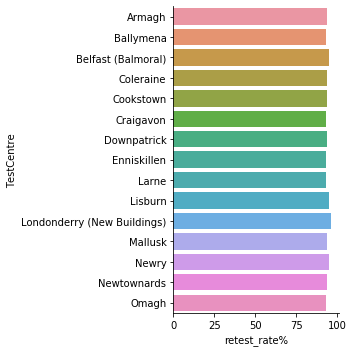

In [62]:
#Visually showing which centre had the highest pass rates for re-tests

graph2 = sns.catplot(x='retest_rate%', y='TestCentre', kind='bar', data=percentage)

In [63]:
#Store a copy of the % pass rates

percentage.to_csv('carpass_rates.csv', index=False)

<h1>Conclusion</h1>

The total full tests that passed over the year 2018-19 was 629920. To get a better insight into which centre had the highest pass rate, the percentage of passes against the total tests carried out at each centre was extracted from the data. This showed that on full tests, Belfast had the highest pass rate with 85% of cars passing on their first test. However, Newbuildings had the highest rate for re-tests with 96% of cars passing on their re-test. 

If you want to have a better chance of success, avoid Larne at all costs.